
# PRINCIPAL COMPONENT ANALYSIS (PCA)

## PCA. Decrease in dimensions compared to other algorithms
### Example with imagesof digits


PCS is not the only method, there are several other methods to reduce the dimension of the data set
* without losing excessively large amounts of information,
* maintaining a high level of accuracy
* and improving the subsequent analysis processes,

be it logarithmic linear regression or whatever
algorithm is applied.

For this example, we will use a data set that contains images of digits from 0 to 9 with
approximately 180 samples of each class. Each image has a dimension of 8x8 = 64, and is
reduced to a two-dimensional data point.

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes
(principal components or instructions in feature space) that account for the greatest variation in
the data.

---
 Here we will plot the different samples in the first two principal components.

* **Linear Discriminant Analysis (LDA)** attempts to identify the attributes that represent the greatest
variation between classes. In particular, LDA, unlike PCA, is a supervised method, using well- known class labels.

* **Neighborhood Component Analysis (NCA)** attempts to find a feature space such that a stochasti nearest neighbor algorithm provides the best accuracy. Like LDA, it is a supervised method.

Import the libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Load the data set that will be used for the analysis and split the data into the training set and the
test set.

In [2]:
# Load the cata
X, y = datasets.load_digits(return_X_y=True)
# Divide the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

Define and instantiate each of the methods to be applied in the comparison.

In [3]:
dim = len(X[0])
n_classes = len (np.unique(y))
pca = make_pipeline(StandardScaler(),PCA(n_components=2, random_state=0) )
# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),LinearDiscriminantAnalysis (n_components=2) )
# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),NeighborhoodComponentsAnalysis(n_components=2, random_state=0) )

For the comparison, the data are transformed by each of the three methods in each iteration and
the Kneighbor classifier is used to obtain the results of the previously transformed data.

It can be seen that NCA enforces clustering of the data that is visually significant despite the large
reduction in dimension.

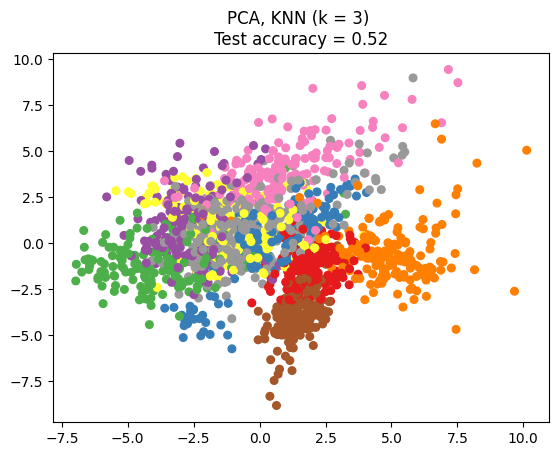

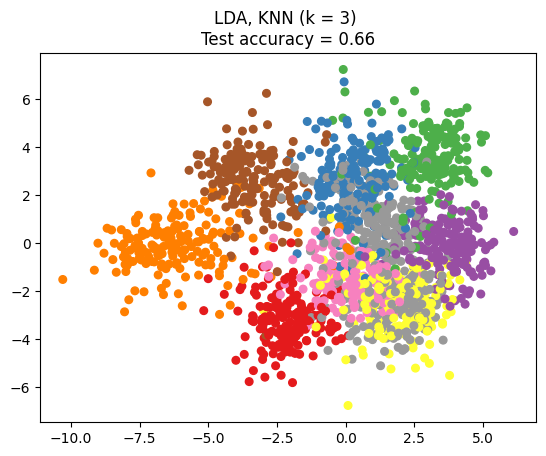

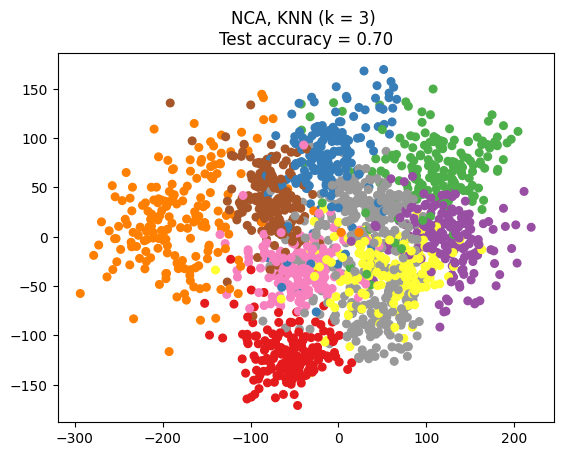

In [4]:
# Use a nearest neighbor classifier to evaluate the methods
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a List of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

for i, (name, model) in enumerate(dim_reduction_methods):
  plt. figure()
  # plt.subplot(1, 3, i+ 1, aspect=1)

  # Fit the method's model
  model. fit(X_train, y_train)

  # Fit a nearest neighbor classifier on the embedded training set
  knn. fit(model.transform(X_train), y_train)

  # Compute the nearest neighbor accuracy on the embedded test set
  acc_knn = knn.score(model.transform(X_test), y_test)

  # Embed the data set in 2 dimensions using the fitted model
  X_embedded = model. transform(X)

  # Plot the projected points and show the evaluation score
  plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
  plt.title("{}, KNN (k = {}) \nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn))

plt.show()